In [1]:
%load_ext watermark
%watermark -v -p sklearn,scipy,numpy,cv2,matplotlib

CPython 3.6.5
IPython 6.4.0

sklearn 0.19.1
scipy 1.1.0
numpy 1.14.3
cv2 3.3.1
matplotlib 2.2.2


맨 처음 사용할 동물 데이터셋은 `datasets/animals` 디렉토리 아래 `cat`, `dogs`, `pandas` 디렉토리에 나뉘어 있습니다. 각 디렉토리에는 동물 이미지가 1,000개씩 들어 있습니다. 디렉토리를 확인해 보겠습니다.

In [2]:
!ls datasets/animals/

cats   dogs   pandas


주피터 셀에서는 `!`과 쉘 명령을 함께 사용할 수 있습니다. `cats` 디렉토리에 있는 전체 파일 리스트를 확인해 보겠습니다.

In [3]:
!ls datasets/animals/cats/

cats_00001.jpg cats_00201.jpg cats_00401.jpg cats_00601.jpg cats_00801.jpg
cats_00002.jpg cats_00202.jpg cats_00402.jpg cats_00602.jpg cats_00802.jpg
cats_00003.jpg cats_00203.jpg cats_00403.jpg cats_00603.jpg cats_00803.jpg
cats_00004.jpg cats_00204.jpg cats_00404.jpg cats_00604.jpg cats_00804.jpg
cats_00005.jpg cats_00205.jpg cats_00405.jpg cats_00605.jpg cats_00805.jpg
cats_00006.jpg cats_00206.jpg cats_00406.jpg cats_00606.jpg cats_00806.jpg
cats_00007.jpg cats_00207.jpg cats_00407.jpg cats_00607.jpg cats_00807.jpg
cats_00008.jpg cats_00208.jpg cats_00408.jpg cats_00608.jpg cats_00808.jpg
cats_00009.jpg cats_00209.jpg cats_00409.jpg cats_00609.jpg cats_00809.jpg
cats_00010.jpg cats_00210.jpg cats_00410.jpg cats_00610.jpg cats_00810.jpg
cats_00011.jpg cats_00211.jpg cats_00411.jpg cats_00611.jpg cats_00811.jpg
cats_00012.jpg cats_00212.jpg cats_00412.jpg cats_00612.jpg cats_00812.jpg
cats_00013.jpg cats_00213.jpg cats_00413.jpg cats_00613.jpg cats_00813.jpg
cats_00014.jpg cats_00214

첫 번째 고양이 이미지를 불러서 화면에 출력해 보겠습니다. 파일 경로에서 이미지를 읽어 주피터 노트북에 표시하는 가장 간단한 방법은 맷플롯립(`matplotlib`)을 사용하는 것입니다. 먼저 `imread()` 함수로 파일을 읽어 넘파이(`NumPy`) 배열로 변환합니다. 그 다음 `imshow()` 함수에 이 넘파이 배열을 전달하면 주피터 노트북에 이미지를 그려 줍니다.

In [4]:
import matplotlib.pyplot as plt

In [5]:
cat = plt.imread('datasets/animals/cats/cats_00001.jpg')

`imread` 함수에서 반환된 값이 넘파이 배열이 맞는지 확인하고 배열의 차원을 확인해 보겠습니다.

In [6]:
type(cat), cat.shape

(numpy.ndarray, (374, 500, 3))

넘파이 배열이 맞네요. 이미지는 높이 374, 넓이 500, 컬러 채널이 3인 이미지입니다. 보통 우리가 일상 생활에서 이미지의 크기를 이야기할 때는 넓이x높이 방식을 사용하지만 컴퓨터는 전통적으로 높이x넓이 입니다. 그래서 이 고양이 이미지는 높이가 374 픽셀의 크기입니다. `imshow()` 함수로 이미지를 출력해 보죠.

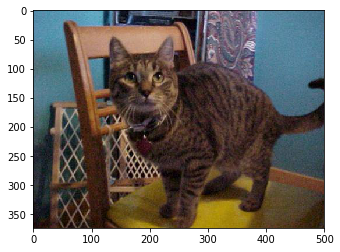

In [7]:
plt.imshow(cat)

각 폴더에서 이미지를 모두 읽어 머신러닝을 위한 데이터셋을 만들겠습니다. 전체 데이터셋을 한 번에 모두 로드하지 않고 일부 데이터를 디스크에서 반복적으로 읽어서 사용할 수 있지만 메모리가 허용 가능하다면 전체 데이터셋을 메모리에 로드하는 것이 편리합니다.

위의 고양이 이미지로 대략적인 전체 데이터셋의 크기를 가늠해 보겠습니다. $3000 \times 374 \times 500 \times 3  \,/\, 1024 \,/\, 1024 = 1.56\text{GB}$로 메모리에 적재할 수 있는 수준으로 판단됩니다.

읽어들일 파일 리스트를 만드는 데는 `glob` 패키지가 매우 편리합니다. `glob.glob()` 함수에 와일드 카드가 포함된 파일 경로를 전달하면 매칭되는 모든 파일 리스트를 만들어 줍니다.

In [8]:
import glob

In [9]:
cat_files = glob.glob('datasets/animals/cats/*.jpg')
len(cat_files)

1000

전체 고양이 이미지 개수는 위에서 언급한 대로 1,000개가 맞네요. `cat_files` 리스트의 앞 부분 몇 개를 확인해 보겠습니다. 파이썬의 리스트는 `:`을 사용하여 여러개의 원소를 선택하는 슬라이싱 기능을 제공합니다. 슬라이싱 인덱스를 지정할 때 `:` 앞의 인덱스가 생략되면 `0`을 의미합니다. `:` 뒤에 지정한 인덱스는 선택에서 빠집니다. 따라서 `:10`은 인덱스 `0`에서 부터 `9`까지 `10`개의 원소를 선택합니다.

In [10]:
cat_files[:10]

['datasets/animals/cats/cats_00417.jpg',
 'datasets/animals/cats/cats_00371.jpg',
 'datasets/animals/cats/cats_00365.jpg',
 'datasets/animals/cats/cats_00403.jpg',
 'datasets/animals/cats/cats_00359.jpg',
 'datasets/animals/cats/cats_00173.jpg',
 'datasets/animals/cats/cats_00615.jpg',
 'datasets/animals/cats/cats_00601.jpg',
 'datasets/animals/cats/cats_00167.jpg',
 'datasets/animals/cats/cats_00629.jpg']

이와 마찬가지로 강아지와 판다의 이미지도 모두 읽어 들입니다.

In [11]:
dog_files = glob.glob('datasets/animals/dogs/*.jpg')
panda_files = glob.glob('datasets/animals/pandas/*.jpg')

이제 전체 이미지를 위에서와 같이 넘파이 배열로 읽어서 리스트에 차례대로 쌓도록 하겠습니다. 그런데 `plt.imread()` 함수는 흑백 이미지일 경우 2차원 배열, 즉 높이x넓이 크기의 배열을 반환합니다. 그래서 읽어 들인 후 높이x넓이x채널 크기로 맞추어 주어야 합니다. 이게 크게 문제되지는 않지만 조금 번거롭기는 합니다.

실제 이런 이미지가 있는지 확인해 보겠습니다. 예를 들면 다음과 같은 이미지입니다.

In [12]:
panda_plt = plt.imread('datasets/animals/pandas/panda_00049.jpg')
panda_plt.shape

(334, 500)

확실히 이 이미지는 2차원 배열로 읽혀졌습니다. 흑백 이미지이므로 `plt.imshow()` 함수에 `cmap` 매개변수를 `'gray'`로 설정하여 출력합니다.

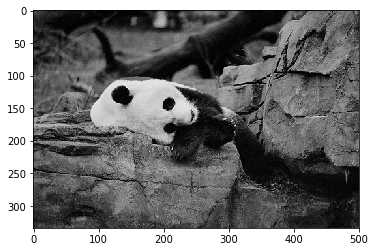

In [13]:
plt.imshow(panda_plt, cmap='gray')

전체 데이터셋에서 흑백 이미지가 대부분이라면 전체 이미지를 흑백으로 바꾸는게 낫겠지만, 여기에서는 흑백 이미지가 몇 개 밖에 되지 않으므로 이를 컬러 이미지의 차원으로 맞추는게 낫습니다. `opencv` 패키지의 `imread()` 함수는 흑백 이미지도 채널 차원을 유지하여 읽을 수 있어 이런 경우에 사용하면 편리합니다.

In [14]:
import cv2

In [15]:
panda_cv = cv2.imread('datasets/animals/pandas/panda_00049.jpg')

In [16]:
panda_cv.shape

(334, 500, 3)

원하는 대로 panda_cv는 채널의 크기가 3인 3차원 배열입니다. `panda_plt` 배열과 `panda_cv` 배열이 어떻게 읽혔는지 첫 번째 행만 살짝 확인해 보겠습니다. 넘파이 배열도 파이썬과 동일한 슬라이싱을 지원합니다.

In [17]:
panda_plt[:1,:10]

array([[88, 82, 70, 75, 75, 87, 79, 81, 82, 80]], dtype=uint8)

In [18]:
panda_cv[:1,:10,:]

array([[[88, 88, 88],
        [82, 82, 82],
        [70, 70, 70],
        [75, 75, 75],
        [75, 75, 75],
        [87, 87, 87],
        [79, 79, 79],
        [81, 81, 81],
        [82, 82, 82],
        [80, 80, 80]]], dtype=uint8)

`opencv`의 `imread()` 함수는 흑백 이미지를 읽을 때 세 개의 컬러 채널에 동일한 값으로 채웠습니다.

이제 그럼 `opencv`를 사용하여 이미지를 읽어 들이고 파이썬 리스트에 차례대로 쌓겠습니다.

In [19]:
X_raw = [cv2.imread(path) for path in cat_files + dog_files + panda_files]

위 코드에서 파이썬의 간결한 리스트 생성 표현인 리스트 내포(List Comprehension)를 사용했습니다. 리스트를 생성하는 대괄호 안에 파이썬의 `for` 반복문을 넣었습니다. 세 개의 파일 경로가 담긴 리스트를 덧셈 연사자로 하나의 리스트 만들었고 이를 순회하면서 `X_raw` 리스트를 채웁니다. 이 표현은 다음의 `for` 반복문과 동일합니다.
```python
X_raw = []
for path in cat_files + dog_files + panda_files:
    X_raw.append(cv2.imread(path)
```
파이썬 코드를 읽다보면 종종 리스트 내포를 만나게 되므로 금방 친숙해질 것입니다.

다음엔 타깃 데이터를 준비합니다.

In [20]:
y_raw = [1]*1000+[2]*1000+[3]*1000

우리는 관례에 따라 모델을 학습하기 위해 사용하는 데이터를 훈련 데이터(training dataset)라고 부르겠습니다. 그리고 각 샘플(여기서는 하나의 이미지)을 훈련 샘플(training sample)이라 부르고 각 훈련 샘플의 레이블(label), 즉 고양이, 강아지, 판다를 타깃(target)이라고 부르겠습니다. 타깃을 참 값(ground truth)라고도 합니다. 이들은 대부분의 머신러닝 커뮤니티에서 널리 사용하는 용어입니다.

타깃 데이터를 만드는 데 좀 이상한 것을 느끼지 않았나요? 위 코드는 `1`이 1,000개, `2`가 1,000개, `3`이 1,000개 들어 있는 긴 리스트를 만듭니다. 이렇게 할 수 있는 것은 위에서 `X_raw` 리스트를 만들었을 때 고양이, 강아지, 판다의 순서대로 차례로 파일을 읽어서 배열로 변환했기 때문입니다. 그러므로 맨 처음 1,000개는 고양이, 그 다음 1,000개는 강아지, 그 다음 1,000개는 판다일 것입니다. 우리는 고양이, 강아지, 판다의 레이블을 각각 `1`, `2`, `3`으로 지정했습니다.

그럼 준비된 데이터의 갯수가 동일한지 확인해 보겠습니다.

In [21]:
len(X_raw), len(y_raw)

(3000, 3000)

우리가 사용할 머신러닝 모델은 전부는 아니지만 대부분 어떤 수학 방정식으로 표현될 수 있습니다(인공 신경망같은 알고리즘은 하나의 수학식으로 표현할 수는 있지만 매우 복잡해서 시도하지 않는게 상책입니다). 예를 들어 가장 간단한 선형 모델(linear model)은 간단한 1차 방정식으로 나타납니다.

$$ \hat{y} = w_1 \times x_1 + w_2 \times x_2 + ... + w_n \times x_n + b $$

보통 머신러닝 모델 방정식에서 $x$가 우리가 가지고 있는 샘플 데이터를 나타냅니다. $x_1$은 샘플에 있는 하나의 특성(feature)을 나타냅니다. 동물 데이터셋의 예에서는 이미지의 픽셀 하나에 해당합니다. 그러므로 우리가 가진 특성은 굉장히 많은 셈입니다. 특성을 속성, 혹은 특징으로 부르는 경우도 있지만 여기에서는 특성이라 부르겠습니다.

$w$는 가중치(weight)의 약자로 입력 특성 $x$와 곱해져 출력(output) 혹은 예측(prediction)을 만들게 됩니다. 보통 이를 가중치로 부르지만 방정식의 기울기(slope) 혹은 계수(coefficient)라고 부르기도 합니다. 종종 머신러닝 커뮤니티에서는 $\theta$로 표시하기도 합니다. 여기에서는 편하게 가중치 $w$로 표시하겠습니다.

$b$는 편향(bias) 또는 절편(intercept)로 부르는 항입니다. 전형적으로 편향은 방정식을 어떤 방향으로 이동시키는 역할을 담당합니다. 우리는 절편대신 편향이라는 용어를 사용하겠습니다. 머신러닝에서 편향/분산 트레이드오프(trade-off) 개념을 이야기할 때 편향은 다릅니다. 이 때는 명확하게 구분하여 설명하겠습니다. 지금은 수학 방정식의 절편을 생각하면 됩니다.

관례적으로 타깃은 $y$ 표현합니다. 우리가 계산한 예측값은 $\hat{y}$으로 표현하고 '와이-햇'이라고 읽습니다. 진짜 정답과 우리가 계산한 정답을 구분하기 위해서죠.

이제 위 식을 이해할 수 있을 것 같습니다. 그런데 $x$의 개수는 고정되어야 할까요? 네 맞습니다. 우리가 찾으려고 하는 모델의 방정식은 하나입니다. $x$의 개수가 달라지면 여러개의 방정식을 만들 수 밖에 없고 확실히 우리가 원하는 바는 아닙니다. 그런데 동물 데이터셋의 이미지 크기는 동일하지 않습니다. 입력 데이터에 있는 특성의 개수를 맞추려면 이미지의 크기를 동일하게 맞추어야 겠네요! 아쉽지만 가장 작은 크기의 이미지로 리사이즈해서 맞추겠습니다.

넘파이 함수를 사용하기 위해서 넘파이 패키지를 임포트하겠습니다. 파이썬에서는 모듈이나 패키지를 임포트할 때 `as` 키워드로 알리아싱(aliasing)을 할 수 있습니다. 위에서 맷플롯립(matplotlib)을 임포트할 때 `plt`로 알리아싱한 것처럼 몇몇 유명한 패키지들은 널리 사용하는 암묵적인 알리아싱 규칙을 가집니다. 대표적인 사례는 다음과 같습니다.
```python
import numpy as np               # 넘파이
import pandas as pd              # 판다스
import matplotlib.pyplot as plt  # 맷플롯립
import tensorflow as tf          # 텐서플로
```
이런 관례들을 꼭 따라야 하는 것은 아지만 이렇게 사용하면 편하게 코드를 읽을 수 있습니다. 여기에서도 이런 관례를 따릅니다.

In [22]:
import numpy as np

다음에 또 리스트 내포가 나옵니다. 이번 리스트 내포는 `X_raw` 리스트에 있는 넘파이 배열을 하나씩 꺼내서 그 크기(`x.shape`)를 리스트로 만듭니다. `X_raw`에 담긴 넘파이 배열이 3차원이므로 `x.shape`도 크기가 3인 튜플입니다. 즉 이 리스트는 크기가 3인 튜플의 리스트가 됩니다. 예를 들어,
```python
[(375, 499, 3),
 (499, 379, 3),
 ...
 (499, 334, 3)]
```
과 같습니다.

넘파이 함수들은 이런 튜플의 리스트나 리스트의 리스트를 자동으로 2차원 배열로 변환하여 처리합니다. 따라서 굳이 명시적으로 넘파이 배열로 변환하지 않고도 `np.min()`과 같은 함수들을 적용할 수 있습니다. `np.min()`은 배열에서 가장 작은 값을 찾는 함수입니다. 이 함수의 두 번째 매개변수는 `axis`로 어느 방향으로 최소 값을 찾을지 결정할 수 있습니다. `0`이면 첫 번째 축인 행을 따라서 최소값을 찾고, `1`이면 열을 따라서 최소값을 찾습니다. 아무것도 지정하지 않으면 전체 배열 원소에서 가장 작은 값을 찾습니다. 이런 행동 방식은 넘파이 배열 함수들의 전형적인 모습입니다.

이미지의 높이와 넓이에서 각각 가장 작은 값을 찾아야하므로 행 방향으로 최소값을 구하겠습니다.

In [23]:
np.min([x.shape for x in X_raw], axis=0)

array([32, 55,  3])

그럼 이제 가장 작은 크기인 32x55 크기로 이미지를 리사이징해야할까요? 잠시 생각해 보면 이미지의 가로/세로 비율이 다를 수 있어 일률적으로 32x55 사이즈로 줄이는 것은 좋지 못할 것 같습니다. 그럼 이 데이터셋의 평균적인 가로/세로 비율은 어떨까요? 다시 한번 리스트 내포를 사용하되 이번에는 평균을 계산해 주는 np.mean 함수를 사용하겠습니다.

In [24]:
np.mean([x.shape[1]/x.shape[0] for x in X_raw])

1.1908899753624713

대략 가로/세로 비율이 1.2 정도군요. 그럼 32x55 보다는 32x38 정도가 가장 무난한 리사이징 크기일 것 같습니다. `X_raw`에 있는 전체 데이터를 `opencv`의 `resize()` 함수를 사용하여 크기를 변경하겠습니다. 이 함수를 사용할 때 주의할 점은 두 번째 매개변수에서 지정할 이미지의 크기가 (넓이, 높이) 순서입니다. `opencv`는 영상 처리에 특화된 패키지이므로 파이썬의 과학 패키지들과는 달리 데이터를 하나의 행렬보다는 이미지로 생각하는 것같습니다.

세 번째 매개변수는 이미지를 리사이징할 때 사용할 보간(interpolation) 방법을 지정하는 것입니다. `interpolation` 매개변수의 기본값은 `cv2.INTER_LINEAR`입니다. 리사이징에서는 기본값보다 모아레 현상을 방지하는 `cv2.INTER_AREA` 방식이 권장됩니다(https://bit.ly/2L97r4T, https://bit.ly/2ItX9ur).

In [25]:
X_data = []
for x in X_raw:
    img = cv2.resize(x, (38, 32), interpolation=cv2.INTER_AREA)
    X_data.append(img)

사실 위 `for` 루프도 리스트 내포로 만들 수 있습니다. 리스트 내포가 너무 길어지면 한 눈에 읽기 힘들어지므로 그냥 `for` 루프로 작성했습니다.

자 이제 `resize()` 메서드가 이미지를 어떻게 바꾸었는지 확인해 보죠. 다음은 원본 데이터셋에 있는 첫 번째 이미지입니다.

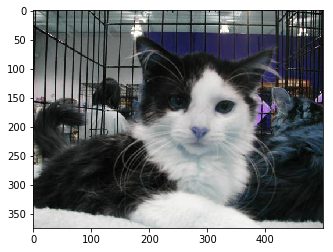

In [26]:
plt.imshow(X_raw[0])

다음은 리사이징된 `X_data` 리스트의 첫 번째 이미지입니다.

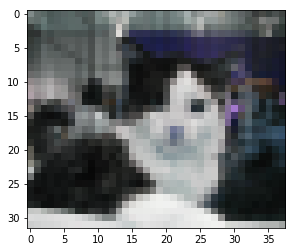

In [27]:
plt.imshow(X_data[0])

확실히 해상도가 많이 줄었네요. 이 이미지는 거의 1/10 이상 줄어든 것 같습니다. 그래도 비교적 부드럽게 리사이징이 잘된 것 같습니다. `X_data` 리스트에 있는 넘파이 배열의 크기가 모두 동일하므로 `X_data` 전체를 넘파이 배열로 바꿀 수 있습니다.

In [28]:
X_data = np.array(X_data)

`X_data` 넘파이 배열의 크기를 확인해 보겠습니다. 첫 번째 차원은 훈련 샘플의 개수가 됩니다.

In [29]:
X_data.shape

(3000, 32, 38, 3)

타깃 데이터도 넘파이 배열로 바꾼 후에 크기를 확인해 보겠습니다.

In [30]:
y_data = np.array(y_raw)
y_data.shape

(3000,)